# Importing the required Libraries

In [2]:
#Import all the necessary modules
import numpy as np
import pandas as pd
# calculate accuracy measures and confusion matrix
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
### Reading the csv file and storing in a pandas dataframe
car=pd.read_csv("cars-dataset.csv")

In [4]:
### Checking for information regarding the missing values in the dataframe
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
car.describe()
### Hp column alone missing in the describe output

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [6]:
car.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [7]:
### Replacing the ? character in the hp columns with Nan values
car = car.replace('?', np.nan)

In [8]:
car.info()
## hp column is found to have 6 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [12]:
### Dropping the car name column as its of no use in the analysis
car=car.drop('car name',axis=1)

In [13]:
### Replacing all the nan values in the dataframe with median values of the corresponding column
car = car.apply(lambda x: x.fillna(x.median()),axis=0)

In [15]:
## Transforming the datatype of hp column from object into float
car['hp'] = car['hp'].astype('float64')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


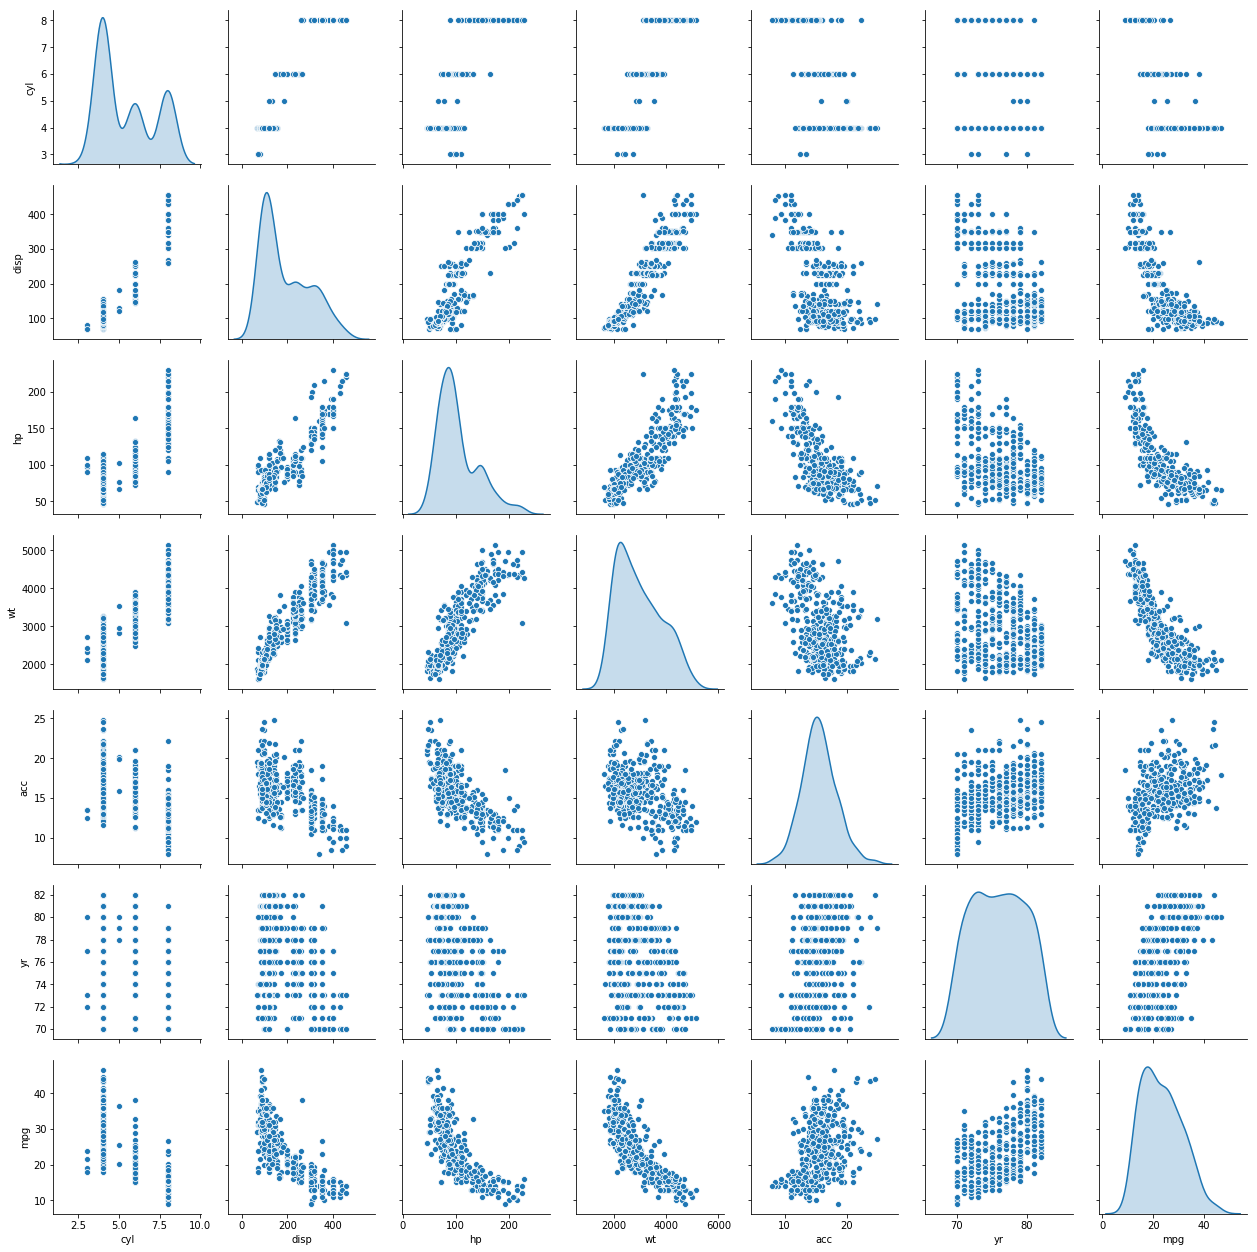

In [17]:
import seaborn as sns
sns.pairplot(car,diag_kind='kde')

### Using seaborn plotting the pairplot.
### From the Gaussian curve in the plot number of clusters are randomly found to be 3

In [19]:
from scipy.stats import zscore
car_z=car.apply(zscore)
## Normalizing and standardizing the data before doing the actual analysis

In [20]:
car_z.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,1.458911e-16,-9.902743e-17,8.982206e-17,-8.837152e-16,2.761610e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.527300e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-1.859374e+00
25%,-8.563206e-01,-8.563178e-01,-7.414364e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.704907e-01
50%,-8.563206e-01,-4.314040e-01,-2.830161e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-6.591883e-02
75%,1.498191e+00,6.584879e-01,5.421404e-01,7.538337e-01,5.834349e-01,8.096310e-01,7.027050e-01
max,1.498191e+00,2.511784e+00,3.292662e+00,2.565185e+00,3.351912e+00,1.621983e+00,2.957335e+00


# K-Means Clustering

In [22]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [28]:
distortion=[]
cluster_range = range( 1, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the inertia
  distortion.append(sum(np.min(distance.cdist(car_z, clusters.cluster_centers_, 'euclidean'), axis=1))/ car_z.shape[0]) 

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1295.122935
2,3,946.019791
3,4,738.374388
4,5,665.343690
5,6,599.850331
6,7,548.650892
7,8,498.489928
8,9,457.347612


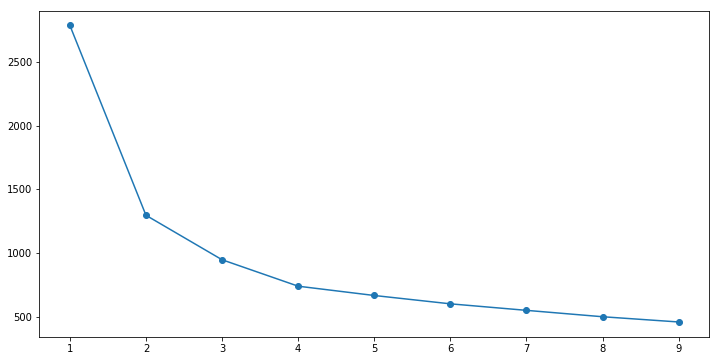

In [29]:
### Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

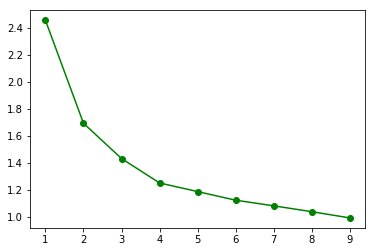

In [30]:
### Screeplot
plt.plot(range(1,10), distortion, 'go-')

From the Elbow and Screeplot the number of clusters varies from 3 to 4. Taking for analysis number of clusters to be 3.

In [31]:
cluster = KMeans( n_clusters = 3, random_state = 10 )
cluster.fit(car_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

# Displaying the centroid values for all columns in the dataframe

In [32]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.49819126,  1.50068407,  1.51412926,  1.40001604, -1.07612225,
        -0.6725559 , -1.15871315],
       [-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.30992304,  0.75394661],
       [ 0.35772459,  0.24687769, -0.04275477,  0.30829922,  0.28578589,
        -0.00272145, -0.47905415]])

In [33]:
centroid_df = pd.DataFrame(centroids, columns = list(car_z) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.500684,1.514129,1.400016,-1.076122,-0.672556,-1.158713
1,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.309923,0.753947
2,0.357725,0.246878,-0.042755,0.308299,0.285786,-0.002721,-0.479054


In [ ]:
# Displaying the label value for all rows in the dataframe
labels=cluster.labels_
labels

# Identifying the clusters in the dataframe

In [35]:
predict=cluster.predict(car_z)
car_z["Label"]=predict

In [37]:
car_z.head(50)

,cyl,disp,hp,wt,acc,yr,mpg,Label
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,0
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.090751,0
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-1.218855,0
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.218855,0
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-1.218855,0
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.090751,0


In [38]:
car_z.groupby("Label").count()

,cyl,disp,hp,wt,acc,yr,mpg
Label,,,,,,,
0,95,95,95,95,95,95,95
1,207,207,207,207,207,207,207
2,96,96,96,96,96,96,96


# Splitting the 3 clusters into 3 different dataframes

In [45]:
car1=car_z[car_z['Label']==0]
car2=car_z[car_z['Label']==1]
car3=car_z[car_z['Label']==2]

In [46]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 292
Data columns (total 8 columns):
cyl      95 non-null float64
disp     95 non-null float64
hp       95 non-null float64
wt       95 non-null float64
acc      95 non-null float64
yr       95 non-null float64
mpg      95 non-null float64
Label    95 non-null int32
dtypes: float64(7), int32(1)
memory usage: 6.3 KB


In [47]:
car2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 14 to 397
Data columns (total 8 columns):
cyl      207 non-null float64
disp     207 non-null float64
hp       207 non-null float64
wt       207 non-null float64
acc      207 non-null float64
yr       207 non-null float64
mpg      207 non-null float64
Label    207 non-null int32
dtypes: float64(7), int32(1)
memory usage: 13.7 KB


In [48]:
car3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 15 to 389
Data columns (total 8 columns):
cyl      96 non-null float64
disp     96 non-null float64
hp       96 non-null float64
wt       96 non-null float64
acc      96 non-null float64
yr       96 non-null float64
mpg      96 non-null float64
Label    96 non-null int32
dtypes: float64(7), int32(1)
memory usage: 6.4 KB


# Linear Regression Model

In [50]:
x = car_z.drop(['Label','mpg'],axis=1)
y = car_z['mpg']
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [53]:
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

In [51]:
def linRegcheckModelPerformance(x, y):
    model = LinearRegression()
    # Covert data into train and test
    seed=7
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                        random_state = seed)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedSales = model.predict(x_train)
    mse = metrics.mean_squared_error(predictedSales, y_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedSales = model.predict(x_test)
    mse = metrics.mean_squared_error(predictedSales, y_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    return ( round(resultsDf, 4))

# Linear Regression run on whole dataset and individually on 3 different clusters as well

In [54]:
linRegcheckModelPerformance(x, y)

,trainData,testData
dataSize,278.0000,120.0000
rmse,0.4198,0.4872
rmsePct,-1238.7213,620.4767
r2,0.8307,0.7352
adjR2,0.8269,0.7212


In [58]:
model1 = LinearRegression()

In [61]:
seed=7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = seed)
model1.fit(x_train,y_train)
print("Coefficients:",model1.coef_)
print("Intercept:",model1.intercept_)

Coefficients: [-0.16456615  0.1369779  -0.0093408  -0.69807577 -0.03003122  0.37577637]
Intercept: -0.0031729462348835495


# First cluster model

In [55]:
x1 = car1.drop(['Label','mpg'],axis=1)
y1 = car1['mpg']
linRegcheckModelPerformance(x1, y1)

,trainData,testData
dataSize,66.0000,29.0000
rmse,0.1831,0.2017
rmsePct,-16.2383,-16.4051
r2,0.5401,0.4699
adjR2,0.4933,0.3253


In [62]:
model2 = LinearRegression()
seed=7
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3,random_state = seed)
model2.fit(x1_train,y1_train)
print("Coefficients:",model2.coef_)
print("Intercept:",model2.intercept_)

Coefficients: [ 0.31033241 -0.15362211 -0.14069279  0.00045725 -0.29633921  0.19332016]
Intercept: -1.3745949609979404


# Second cluster model

In [56]:
x2 = car2.drop(['Label','mpg'],axis=1)
y2 = car2['mpg']
linRegcheckModelPerformance(x2, y2)

,trainData,testData
dataSize,144.0000,63.0000
rmse,0.4087,0.4111
rmsePct,54.4379,54.0108
r2,0.6877,0.6675
adjR2,0.6740,0.6318


In [63]:
model3 = LinearRegression()
seed=7
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3,random_state = seed)
model3.fit(x2_train,y2_train)
print("Coefficients:",model3.coef_)
print("Intercept:",model3.intercept_)

Coefficients: [ 1.86812035 -0.80140982 -0.08731632 -0.6599066   0.02234782  0.44491151]
Intercept: 0.9816748112486497


# Third cluster model

In [57]:
x3 = car3.drop(['Label','mpg'],axis=1)
y3 = car3['mpg']
linRegcheckModelPerformance(x3, y3)

,trainData,testData
dataSize,67.0000,29.0000
rmse,0.2685,0.3765
rmsePct,-57.8362,-73.3385
r2,0.5810,-0.4225
adjR2,0.5391,-0.8104


In [64]:
model4 = LinearRegression()
seed=7
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3,random_state = seed)
model4.fit(x3_train,y3_train)
print("Coefficients:",model4.coef_)
print("Intercept:",model4.intercept_)

Coefficients: [ 0.03124469 -0.17449885 -0.27786456 -0.1224788  -0.28485143  0.25374022]
Intercept: -0.34267203412712677


In [65]:
x_train.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')

# Displaying coefficients of 3 different clusters individually 

In [71]:
Lincoeff=pd.DataFrame(columns=['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'],index=[0,1,2])
Lincoeff.loc[0]=model2.coef_
Lincoeff.loc[1]=model3.coef_
Lincoeff.loc[2]=model4.coef_

In [72]:
Lincoeff

,cyl,disp,hp,wt,acc,yr
0,0.310332,-0.153622,-0.140693,0.000457252,-0.296339,0.19332
1,1.86812,-0.80141,-0.0873163,-0.659907,0.0223478,0.444912
2,0.0312447,-0.174499,-0.277865,-0.122479,-0.284851,0.25374


# Accuracy or the amount of variance captured by the model is Higher when the whole dataframe with all clusters is taken into account ( 70 to 75%) than the individual clusters.